<h1>ML Classification (Adapted from Classification with Python course project)</h1>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [6]:
df_new = df.append(test_df, ignore_index=True)
df_new

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
395,348,348,COLLECTION,1000,30,9/11/2016,10/10/2016,32,High School or Below,male
396,349,349,COLLECTION,800,15,9/11/2016,9/25/2016,29,college,male
397,369,369,COLLECTION,1000,30,9/11/2016,10/10/2016,37,High School or Below,male
398,370,370,COLLECTION,800,15,9/11/2016,9/25/2016,36,High School or Below,male


In [7]:
df_new = df_new.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_new

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
395,COLLECTION,1000,30,9/11/2016,10/10/2016,32,High School or Below,male
396,COLLECTION,800,15,9/11/2016,9/25/2016,29,college,male
397,COLLECTION,1000,30,9/11/2016,10/10/2016,37,High School or Below,male
398,COLLECTION,800,15,9/11/2016,9/25/2016,36,High School or Below,male


In [8]:
df_new.to_csv("loan.csv")

In [9]:
df_new = pd.read_csv('loan.csv')

In [10]:
df_new = df_new.drop(columns=['Unnamed: 0'])
df_new

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
395,COLLECTION,1000,30,9/11/2016,10/10/2016,32,High School or Below,male
396,COLLECTION,800,15,9/11/2016,9/25/2016,29,college,male
397,COLLECTION,1000,30,9/11/2016,10/10/2016,37,High School or Below,male
398,COLLECTION,800,15,9/11/2016,9/25/2016,36,High School or Below,male


In [11]:
df_new.isna().sum().sum()

0

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     400 non-null    object
 1   Principal       400 non-null    int64 
 2   terms           400 non-null    int64 
 3   effective_date  400 non-null    object
 4   due_date        400 non-null    object
 5   age             400 non-null    int64 
 6   education       400 non-null    object
 7   Gender          400 non-null    object
dtypes: int64(3), object(5)
memory usage: 25.1+ KB


In [13]:
df_new.isna().sum().sum()

0

In [14]:
df_new.describe()

,Principal,terms,age
count,400.00000,400.000000,400.000000
mean,939.75000,22.550000,31.060000
std,120.33761,8.100094,6.033441
min,300.00000,7.000000,18.000000
25%,800.00000,15.000000,27.000000
50%,1000.00000,30.000000,30.000000
75%,1000.00000,30.000000,35.000000
max,1000.00000,30.000000,51.000000


In [15]:
df_new['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

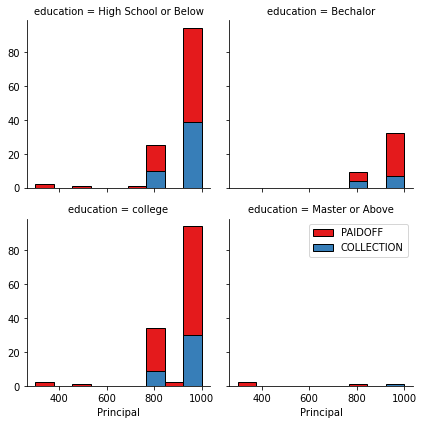

In [16]:
import seaborn as sns

bins = np.linspace(df_new.Principal.min(), df_new.Principal.max(), 10)
g = sns.FacetGrid(df_new, col="education", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [17]:
df_new.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

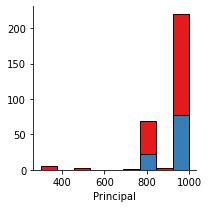

In [18]:
bins = np.linspace(df_new.Principal.min(), df_new.Principal.max(), 10)
g = sns.FacetGrid(df_new, hue="loan_status", palette="Set1")
g.map(plt.hist, 'Principal', bins=bins, ec="k")

plt.show()

In [19]:
df_new.groupby(['Principal'])['loan_status'].value_counts(normalize=True)

Principal  loan_status
300        PAIDOFF        1.000000
500        PAIDOFF        1.000000
700        PAIDOFF        1.000000
800        PAIDOFF        0.750000
           COLLECTION     0.250000
900        PAIDOFF        1.000000
1000       PAIDOFF        0.740741
           COLLECTION     0.259259
Name: loan_status, dtype: float64

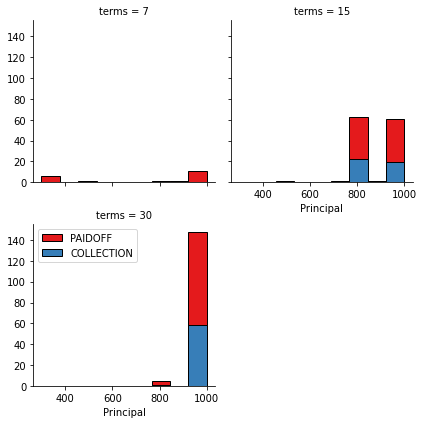

In [20]:
bins = np.linspace(df_new.Principal.min(), df_new.Principal.max(), 10)
g = sns.FacetGrid(df_new, col="terms", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [21]:
df_new.groupby(['terms'])['loan_status'].value_counts(normalize=True)

terms  loan_status
7      PAIDOFF        1.000000
15     PAIDOFF        0.755952
       COLLECTION     0.244048
30     PAIDOFF        0.721698
       COLLECTION     0.278302
Name: loan_status, dtype: float64

In [22]:
df_new['age'].mean()

31.06

In [23]:
df_new['age'].min()

18

In [24]:
df_new['age'].max()

51

In [25]:
df_new['age'].describe()

count    400.000000
mean      31.060000
std        6.033441
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     400 non-null    object
 1   Principal       400 non-null    int64 
 2   terms           400 non-null    int64 
 3   effective_date  400 non-null    object
 4   due_date        400 non-null    object
 5   age             400 non-null    int64 
 6   education       400 non-null    object
 7   Gender          400 non-null    object
dtypes: int64(3), object(5)
memory usage: 25.1+ KB


In [27]:
df_new.describe()

,Principal,terms,age
count,400.00000,400.000000,400.000000
mean,939.75000,22.550000,31.060000
std,120.33761,8.100094,6.033441
min,300.00000,7.000000,18.000000
25%,800.00000,15.000000,27.000000
50%,1000.00000,30.000000,30.000000
75%,1000.00000,30.000000,35.000000
max,1000.00000,30.000000,51.000000


In [28]:
df_new.isna().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

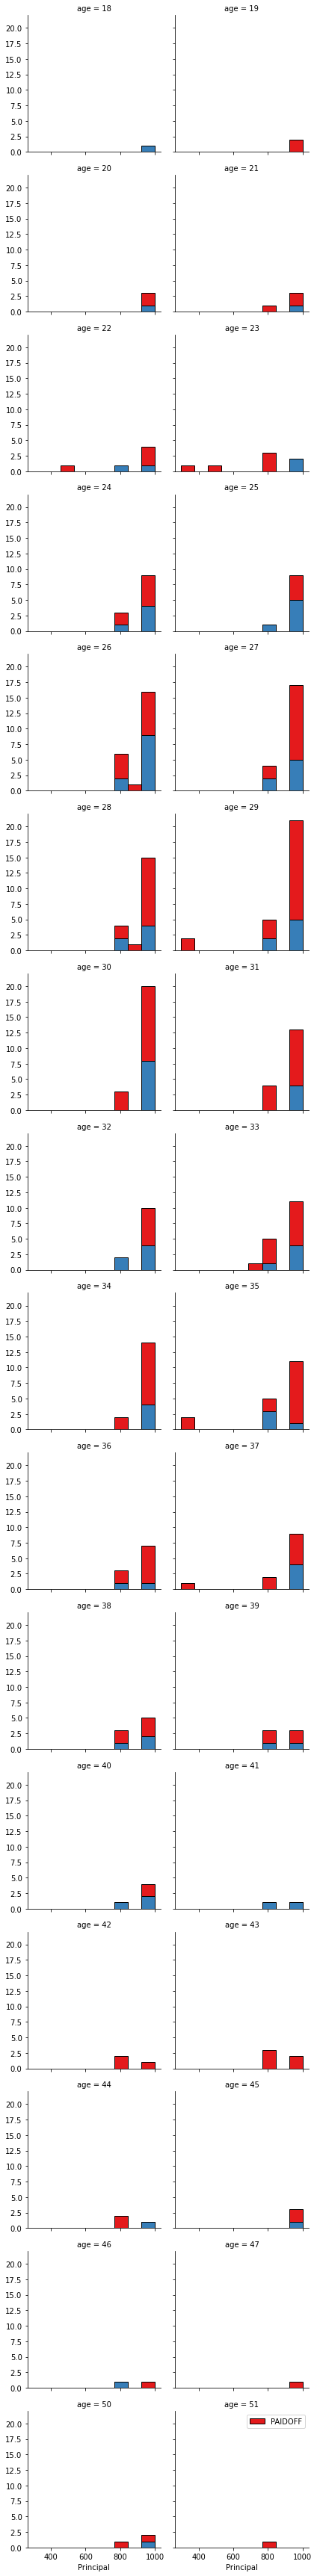

In [29]:
bins = np.linspace(df_new.Principal.min(), df_new.Principal.max(), 10)
g = sns.FacetGrid(df_new, col="age", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

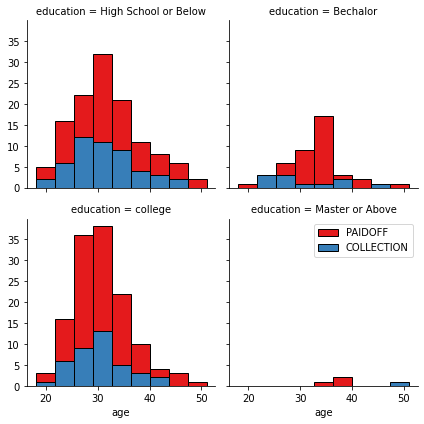

In [30]:
bins = np.linspace(df_new.age.min(), df_new.age.max(), 10)
g = sns.FacetGrid(df_new, col="education", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [164]:
df.groupby(['age'])['loan_status'].value_counts(normalize=True)

age  loan_status
18   COLLECTION     1.000000
19   PAIDOFF        1.000000
20   PAIDOFF        1.000000
21   PAIDOFF        0.800000
     COLLECTION     0.200000
22   PAIDOFF        0.714286
     COLLECTION     0.285714
23   PAIDOFF        0.750000
     COLLECTION     0.250000
24   PAIDOFF        0.714286
     COLLECTION     0.285714
25   PAIDOFF        0.625000
     COLLECTION     0.375000
26   PAIDOFF        0.689655
     COLLECTION     0.310345
27   PAIDOFF        0.760000
     COLLECTION     0.240000
28   PAIDOFF        0.750000
     COLLECTION     0.250000
29   PAIDOFF        0.777778
     COLLECTION     0.222222
30   PAIDOFF        0.740741
     COLLECTION     0.259259
31   PAIDOFF        0.842105
     COLLECTION     0.157895
32   PAIDOFF        0.642857
     COLLECTION     0.357143
33   PAIDOFF        0.823529
     COLLECTION     0.176471
34   PAIDOFF        0.800000
     COLLECTION     0.200000
35   PAIDOFF        0.800000
     COLLECTION     0.200000
36   PAIDOFF        0.8888

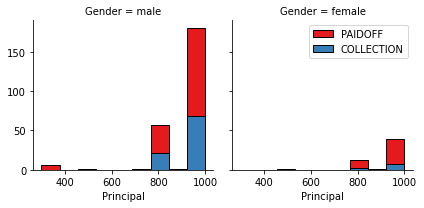

In [31]:
import seaborn as sns

bins = np.linspace(df_new.Principal.min(), df_new.Principal.max(), 10)
g = sns.FacetGrid(df_new, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

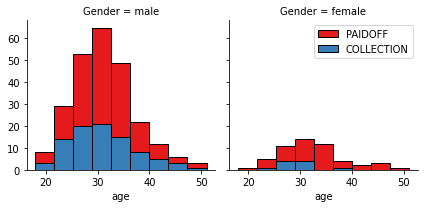

In [32]:
bins = np.linspace(df_new.age.min(), df_new.age.max(), 10)
g = sns.FacetGrid(df_new, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [34]:
#Convert to date time object
df_new['due_date'] = pd.to_datetime(df_new['due_date'])
df_new['effective_date'] = pd.to_datetime(df_new['effective_date'])
df_new.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [35]:
df_new['dayofweek'] = df_new['effective_date'].dt.dayofweek
df_new.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


In [36]:
df_new['weekend'] = df_new['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_new.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [37]:
df_new

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
...,...,...,...,...,...,...,...,...,...,...
395,COLLECTION,1000,30,2016-09-11,2016-10-10,32,High School or Below,male,6,1
396,COLLECTION,800,15,2016-09-11,2016-09-25,29,college,male,6,1
397,COLLECTION,1000,30,2016-09-11,2016-10-10,37,High School or Below,male,6,1
398,COLLECTION,800,15,2016-09-11,2016-09-25,36,High School or Below,male,6,1


In [39]:
df_new['Gender_bin'] = df_new['Gender'].apply(lambda x: 1 if (x=='female')  else 0)
df_new.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Gender_bin
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,0


In [40]:
Feature = df_new[['Principal','terms','age','Gender_bin','weekend']]
Feature = Feature.rename(columns={"Gender_bin": "gender"})
Feature = pd.concat([Feature,pd.get_dummies(df_new['education'])], axis=1)
Feature.head()

,Principal,terms,age,gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [41]:
X = Feature
X[0:5]

,Principal,terms,age,gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [42]:
y = df_new['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [43]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.50130175,  0.92089421,  2.31334964, -0.43236977, -1.21838912,
        -0.38655567,  1.15133896, -0.10050378, -0.86855395],
       [ 0.50130175,  0.92089421,  0.32194392,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.10050378, -0.86855395],
       [ 0.50130175, -0.9332552 , -0.67375893, -0.43236977, -1.21838912,
        -0.38655567, -0.86855395, -0.10050378,  1.15133896],
       [ 0.50130175,  0.92089421, -0.50780846,  2.31283513,  0.82075585,
        -0.38655567, -0.86855395, -0.10050378,  1.15133896],
       [ 0.50130175,  0.92089421, -0.34185798, -0.43236977,  0.82075585,
        -0.38655567, -0.86855395, -0.10050378,  1.15133896]])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 9) (320,)
Test set: (80, 9) (80,)


<h2>1. Logistic regression models</h2>

<h3>1.1. Simple logistic regresssion model</h3>

In [161]:
# Building and training Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_lr = lr.predict(X_test)
print("F1 score:", round(f1_score(y_test, yhat_lr, average='weighted'), 4))
print("Jaccard score:", round(jaccard_score(y_test, yhat_lr, pos_label='PAIDOFF'), 4))

F1 score: 0.6914
Jaccard score: 0.7857


<h3>1.2. Logistic regression with L1 regularization</h3>

In [162]:
# L1 regularized logistic regression
from sklearn.linear_model import LogisticRegressionCV
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
yhat_lr_l1 = lr_l1.predict(X_test)
print("F1 score:", round(f1_score(y_test, yhat_lr_l1, average='weighted'), 4))
print("Jaccard score:", round(jaccard_score(y_test, yhat_lr_l1, pos_label='PAIDOFF'), 4))

F1 score: 0.7143
Jaccard score: 0.75


<h3>1.3. Logistic regression with L2 regularization</h3>

In [163]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
yhat_lr_l2 = lr_l2.predict(X_test)
print("F1 score:", round(f1_score(y_test, yhat_lr_l2, average='weighted'), 4))
print("Jaccard score:", round(jaccard_score(y_test, yhat_lr_l2, pos_label='PAIDOFF'), 4))

F1 score: 0.7048
Jaccard score: 0.7353


In [48]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [49]:
yhat_lr = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)
print("Jaccard score of Logistic Regression model:", jaccard_score(y_test, yhat_lr, pos_label='PAIDOFF'))
print("F1 score of Logistic Regression model:", f1_score(y_test, yhat_lr, average='weighted'))
print("Log loss of Logistic Regression model:", log_loss(y_test, yhat_prob))

Jaccard score of Logistic Regression model: 0.7631578947368421
F1 score of Logistic Regression model: 0.7401262916188289
Log loss of Logistic Regression model: 0.5384881291946579


In [50]:
yhat_lr_l1 = lr_l1.predict(X_test)
yhat_prob_l1 = lr_l1.predict_proba(X_test)
print("Jaccard score of Logistic Regression model with regularization L1:", 
      jaccard_score(y_test, yhat_lr_l1, pos_label='PAIDOFF'))
print("F1 score of Logistic Regression model with regularization L1:", 
      f1_score(y_test, yhat_lr_l1, average='weighted'))
print("Log loss of Logistic Regression model with regularization L1:", log_loss(y_test, yhat_prob_l1))

Jaccard score of Logistic Regression model with regularization L1: 0.775
F1 score of Logistic Regression model with regularization L1: 0.6767605633802817
Log loss of Logistic Regression model with regularization L1: 0.4751396082936562


In [51]:
yhat_lr_l2 = lr_l2.predict(X_test)
yhat_prob_l2 = lr_l2.predict_proba(X_test)
print("Jaccard score of Logistic Regression model with regularization L2:", 
      jaccard_score(y_test, yhat_lr_l2, pos_label='PAIDOFF'))
print("F1 score of Logistic Regression model with regularization L2:", 
      f1_score(y_test, yhat_lr_l2, average='weighted'))
print("Log loss of Logistic Regression model with regularization L2:", log_loss(y_test, yhat_prob_l2))

Jaccard score of Logistic Regression model with regularization L2: 0.7837837837837838
F1 score of Logistic Regression model with regularization L2: 0.7774891774891775
Log loss of Logistic Regression model with regularization L2: 0.6897670821092982


| Model               | Jaccard | F1-score | LogLoss |
| ------------------- | ------- | -------- | ------- |
| Logistic regression | 0.7662  | 0.7287   | 0.5467  |
| L1 regularization   | 0.7750  | 0.6768   | 0.4915  |
| L2 regularization   | 0.7733  | 0.7593   | 0.6899  |

| Model                         |F1-score | Jaccard |
| ----------------------------- | ------- | ------- |
| logistic regression (LR)      | 0.7401  | 0.7632  |
| LR with L1 regularization     | 0.6768  | 0.7750  |
| LR with L2 regularization     | 0.7775  | 0.7838  |
| KNN (k=3)                     | 0.7143  | 0.6923  |
| KNN (k=5)                     | 0.754   | 0.7344  |
| SVM with linear kernel        | 0.6954  | 0.7206  |
| SVM with rbf kernel           | 0.7276  | 0.7273  |
| decision tree                 | 0.7065  | 0.7681  |
| random forest (RF)            | 0.8857  | 0.8644  |
| voting classifier (LR_L2, RF) | 0.8857  | 0.8644  |
| voting classifier (knn3, RF)  | 0.8827  | 0.8667  |

In [52]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

In [54]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head(20)

,lr,l1,l2
0,PAIDOFF,PAIDOFF,PAIDOFF
1,PAIDOFF,PAIDOFF,PAIDOFF
2,PAIDOFF,PAIDOFF,PAIDOFF
3,PAIDOFF,PAIDOFF,PAIDOFF
4,COLLECTION,PAIDOFF,COLLECTION
5,COLLECTION,PAIDOFF,COLLECTION
6,PAIDOFF,PAIDOFF,PAIDOFF
7,PAIDOFF,PAIDOFF,PAIDOFF
8,PAIDOFF,PAIDOFF,PAIDOFF
9,COLLECTION,PAIDOFF,COLLECTION


In [55]:
y_test

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
     

In [56]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    accuracy = accuracy_score(y_test, y_pred[lab])
  
    jaccard = jaccard_score(y_test, y_pred[lab], pos_label='PAIDOFF')
    logloss = log_loss(y_test, y_prob[lab])
    
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'f1-score':fscore,
                              'accuracy':accuracy,
                              'jaccard':jaccard, 'log-loss':logloss
                             },
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [57]:
metrics

,lr,l1,l2
precision,0.736806,0.600625,0.777143
recall,0.775000,0.775000,0.800000
f1-score,0.740126,0.676761,0.777489
accuracy,0.775000,0.775000,0.800000
jaccard,0.763158,0.775000,0.783784
log-loss,0.537845,0.475140,0.689762


In [58]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.22      0.31        18
     PAIDOFF       0.81      0.94      0.87        62

    accuracy                           0.78        80
   macro avg       0.65      0.58      0.59        80
weighted avg       0.74      0.78      0.74        80



In [59]:
y_pred_lr_l1 = lr_l1.predict(X_test)
print(classification_report(y_test, y_pred_lr_l1, zero_division=1))

              precision    recall  f1-score   support

  COLLECTION       1.00      0.00      0.00        18
     PAIDOFF       0.78      1.00      0.87        62

    accuracy                           0.78        80
   macro avg       0.89      0.50      0.44        80
weighted avg       0.83      0.78      0.68        80



In [60]:
y_pred_lr_l1 = lr_l1.predict(X_test)
print(classification_report(y_test, y_pred_lr_l1, zero_division=0))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        18
     PAIDOFF       0.78      1.00      0.87        62

    accuracy                           0.78        80
   macro avg       0.39      0.50      0.44        80
weighted avg       0.60      0.78      0.68        80



In [61]:
lr_l11 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [62]:
y_pred_lr_l11 = lr_l11.predict(X_test)
print(classification_report(y_test, y_pred_lr_l11))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        18
     PAIDOFF       0.78      1.00      0.87        62

    accuracy                           0.78        80
   macro avg       0.39      0.50      0.44        80
weighted avg       0.60      0.78      0.68        80



In [63]:
lr_l11 = LogisticRegressionCV(penalty='l1', solver='liblinear').fit(X_train, y_train)

In [64]:
y_pred_lr_l11 = lr_l11.predict(X_test)
print(classification_report(y_test, y_pred_lr_l11))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        18
     PAIDOFF       0.78      1.00      0.87        62

    accuracy                           0.78        80
   macro avg       0.39      0.50      0.44        80
weighted avg       0.60      0.78      0.68        80



In [65]:
y_pred_lr_l2 = lr_l2.predict(X_test)
print(classification_report(y_test, y_pred_lr_l2))

              precision    recall  f1-score   support

  COLLECTION       0.60      0.33      0.43        18
     PAIDOFF       0.83      0.94      0.88        62

    accuracy                           0.80        80
   macro avg       0.71      0.63      0.65        80
weighted avg       0.78      0.80      0.78        80



<h2>2. K-nearest neighbors</h2>

<h3>2.1. K=3</h3>

In [148]:
#K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
y_pred = knn3.predict(X_test)
print('F1 Score: ', round(f1_score(y_test, y_pred, average='weighted'), 4))
print('Jaccard: ', round(jaccard_score(y_test, y_pred, pos_label='PAIDOFF'), 4))

F1 Score:  0.7143
Jaccard:  0.6923


<h3>2.2 K=5</h3>

In [149]:
knn5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
y_pred = knn5.predict(X_test)
print('F1 Score: ', round(f1_score(y_test, y_pred, average='weighted'), 4))
print('Jaccard: ', round(jaccard_score(y_test, y_pred, pos_label='PAIDOFF'), 4))

F1 Score:  0.754
Jaccard:  0.7344


In [69]:
knn3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
knn3

KNeighborsClassifier(n_neighbors=3)

In [70]:
y_pred = knn3.predict(X_test)
# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average='weighted'), 6))
print('Jaccard: ', round(jaccard_score(y_test, y_pred, pos_label='PAIDOFF'), 6))

              precision    recall  f1-score   support

  COLLECTION       0.46      0.61      0.52        18
     PAIDOFF       0.88      0.79      0.83        62

    accuracy                           0.75        80
   macro avg       0.67      0.70      0.68        80
weighted avg       0.78      0.75      0.76        80

Accuracy score:  0.75
F1 Score:  0.761501
Jaccard:  0.710145


In [71]:
knn5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
knn5

KNeighborsClassifier()

In [72]:
y_pred = knn5.predict(X_test)
# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average='weighted'), 6))
print('Jaccard: ', round(jaccard_score(y_test, y_pred, pos_label='PAIDOFF'), 6))

              precision    recall  f1-score   support

  COLLECTION       0.44      0.67      0.53        18
     PAIDOFF       0.89      0.76      0.82        62

    accuracy                           0.74        80
   macro avg       0.67      0.71      0.68        80
weighted avg       0.79      0.74      0.75        80

Accuracy score:  0.74
F1 Score:  0.753478
Jaccard:  0.691176


In [73]:
# Finding the best k (number of neighbors)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
mean_acc

Train set Accuracy:  0.8125
Test set Accuracy:  0.7125


array([0.725 , 0.625 , 0.75  , 0.675 , 0.7375, 0.6875, 0.7   , 0.675 ,
       0.7125])

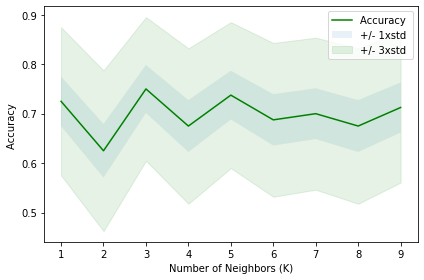

In [74]:
# Plotting the model accuracy for a different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

<h2>3. Support vector machine</h2>

<h3>3.1. SVM with linear kernel</h3>

In [150]:
# Building SVM model and training it
from sklearn.svm import LinearSVC
LSVC = LinearSVC().fit(X_train, y_train)
yhat_lsvc = LSVC.predict(X_test)
print("Jaccard score:", round(jaccard_score(y_test, yhat_lsvc, pos_label='PAIDOFF'), 4))
print("F1 score", round(f1_score(y_test, yhat_lsvc, average='weighted'), 4))

Jaccard score: 0.7206
F1 score 0.6954


<h3>3.2. SVM with non-linear (RBF) kernel</h3>

In [152]:
from sklearn.svm import SVC
RBF = SVC(kernel='rbf').fit(X_train, y_train)
yhat_rbf = RBF.predict(X_test)
print("Jaccard score:", round(jaccard_score(y_test, yhat_rbf, pos_label='PAIDOFF'), 4))
print("F1 score", round(f1_score(y_test, yhat_rbf, average='weighted'), 4))

Jaccard score: 0.7273
F1 score 0.7276


In [75]:
# Building SVM model and training it
from sklearn.svm import LinearSVC, SVC
X_train, y_train = X, y
clf = SVC(kernel='rbf').fit(X_train, y_train)
clf 

SVC()

In [76]:
yhat_svm = clf.predict(X_test)
print("Jaccard score of SVM model:", jaccard_score(y_test, yhat_svm, pos_label='PAIDOFF'))
print("F1 score of SVM model", f1_score(y_test, yhat_svm, average='weighted'))

Jaccard score of SVM model: 0.8285714285714286
F1 score of SVM model 0.84296875


In [77]:
LSVC = LinearSVC().fit(X_train, y_train)
##LSVC.fit(X, y)

In [78]:
yhat_lsvc = LSVC.predict(X_test)
print("Jaccard score of SVM model:", jaccard_score(y_test, yhat_lsvc, pos_label='PAIDOFF'))
print("F1 score of SVM model", f1_score(y_test, yhat_lsvc, average='weighted'))

Jaccard score of SVM model: 0.7733333333333333
F1 score of SVM model 0.7592731829573935


<h2>4. Decision tree</h2>

In [153]:
# Building and training Decision Tree model
from sklearn.tree import DecisionTreeClassifier
X_train, y_train = X, y
dt = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth = 4).fit(X_train, y_train)
yhat_dt = dt.predict(X_test)
print("Jaccard score:", round(jaccard_score(y_test, yhat_dt, pos_label='PAIDOFF'), 4))
print("F1 score:", round(f1_score(y_test, yhat_dt, average='weighted'), 4))

Jaccard score: 0.7681
F1 score: 0.7065


In [79]:
# Building and training Decision Tree model
from sklearn.tree import DecisionTreeClassifier
X_train, y_train = X, y
dt = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth = 4).fit(X_train, y_train)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [80]:
yhat_dt = dt.predict(X_test)
print("Jaccard score of Decision Tree model:", jaccard_score(y_test, yhat_dt, pos_label='PAIDOFF'))
print("F1 score of Decision Tree model:", f1_score(y_test, yhat_dt, average='weighted'))

Jaccard score of Decision Tree model: 0.7941176470588235
F1 score of Decision Tree model: 0.8281708369283866


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

In [83]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.767500,0.825000
precision,0.756723,0.832500
recall,0.767500,0.825000
f1,0.760910,0.828171


In [84]:
y_test_pred = dt.predict(X_test)
measure_error(y_train, y_train_pred, 'train')

accuracy     0.767500
precision    0.756723
recall       0.767500
f1           0.760910
Name: train, dtype: float64

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [86]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(3, 1)

In [87]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [88]:
train_test_gr_error

,train,test
accuracy,0.750000,0.775000
precision,0.562500,0.600625
recall,0.750000,0.775000
f1,0.642857,0.676761


<h1>5. Random forest</h1>

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.3125
20.0,0.3050
30.0,0.3075
40.0,0.2975
50.0,0.3025
100.0,0.2950
150.0,0.2900
200.0,0.2975
300.0,0.3000


In [157]:
#from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, random_state=42).fit(X_train, y_train)
y_pred = RF.predict(X_test)
print("Jaccard score:", round(jaccard_score(y_test, y_pred, pos_label='PAIDOFF'), 4))
print("F1 score:", round(f1_score(y_test, y_pred, average='weighted'), 4))

Jaccard score: 0.8644
F1 score: 0.8857


In [90]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.3100
20.0,0.3050
30.0,0.3050
40.0,0.2950
50.0,0.3025
100.0,0.2875
150.0,0.2900
200.0,0.2975
300.0,0.3000


In [91]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.3125,0.3100
20.0,0.3050,0.3050
30.0,0.3075,0.3050
40.0,0.2975,0.2950
50.0,0.3025,0.3025
100.0,0.2950,0.2875
150.0,0.2900,0.2900
200.0,0.2975,0.2975
300.0,0.3000,0.3000


In [92]:
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [93]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred, average='weighted'),
                         'recall': recall_score(y_test, y_pred, average='weighted'),
                         'f1': f1_score(y_test, y_pred, average='weighted'),
                         'jaccard':jaccard_score(y_test, y_pred, pos_label='PAIDOFF')
#                         'auc': roc_auc_score(y_test, y_pred)
                        },
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

  COLLECTION       0.67      0.78      0.72        18
     PAIDOFF       0.93      0.89      0.91        62

    accuracy                           0.86        80
   macro avg       0.80      0.83      0.81        80
weighted avg       0.87      0.86      0.87        80

   accuracy  precision  recall        f1   jaccard
0    0.8625   0.872458  0.8625  0.866084  0.833333


In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train, y_train)
    y_pred = GBC.predict(X_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees


,error
n_trees,
15.0,0.225
25.0,0.200
50.0,0.175
100.0,0.150


In [95]:
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [96]:
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=1, n_estimators=15, random_state=42,
                           subsample=0.5)

In [97]:
from sklearn.metrics import classification_report

y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
     PAIDOFF       1.00      0.78      0.87        80

    accuracy                           0.78        80
   macro avg       0.50      0.39      0.44        80
weighted avg       1.00      0.78      0.87        80



In [98]:
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred, average='weighted'),
                         'recall': recall_score(y_test, y_pred, average='weighted'),
                         'f1': f1_score(y_test, y_pred, average='weighted'),
                        },
                         index=pd.Index([0]))

print(score_df)

   accuracy  precision  recall        f1
0     0.775   0.600625   0.775  0.676761


In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

In [100]:
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100)

In [101]:
y_pred1 = GV_ABC.predict(X_test)
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         0
     PAIDOFF       1.00      0.78      0.87        80

    accuracy                           0.78        80
   macro avg       0.50      0.39      0.44        80
weighted avg       1.00      0.78      0.87        80



In [102]:
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred1),
                         'precision': precision_score(y_test, y_pred1, average='weighted'),
                         'recall': recall_score(y_test, y_pred1, average='weighted'),
                         'f1': f1_score(y_test, y_pred1, average='weighted'),
                        },
                         index=pd.Index([0]))

print(score_df)

   accuracy  precision  recall        f1
0     0.775   0.600625   0.775  0.676761


<h2>6. Voting classifiers</h2>

<h3>6.1. Voting classifier with logistic regression with L2 and random forest</h3>

In [159]:
from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression with L2 and random forest
estimators1 = [('lr_l2', lr_l2), ('RF', RF)]
VC1 = VotingClassifier(estimators1, voting='soft')
VC1 = VC1.fit(X_train, y_train)
y_pred = VC1.predict(X_test)
print("Jaccard score:", round(jaccard_score(y_test, y_pred, pos_label='PAIDOFF'), 4))
print("F1 score", round(f1_score(y_test, y_pred, average='weighted'), 4))

Jaccard score: 0.8644
F1 score 0.8857


<h3>6.2. Voting classifier with KNN (k=3) and random forest</h3>

In [110]:
#from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression and random forest
estimators3 = [('lr_l2', lr_l2), ('knn3', knn3), ('RF', RF)]
VC3 = VotingClassifier(estimators2, voting='soft')
VC3 = VC3.fit(X_train, y_train)

y_pred4 = VC3.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

  COLLECTION       0.75      0.67      0.71        18
     PAIDOFF       0.91      0.94      0.92        62

    accuracy                           0.88        80
   macro avg       0.83      0.80      0.81        80
weighted avg       0.87      0.88      0.87        80



In [111]:
score_df_vc = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred4),
                         'precision': precision_score(y_test, y_pred4, average='weighted'),
                         'recall': recall_score(y_test, y_pred4, average='weighted'),
                         'f1': f1_score(y_test, y_pred4, average='weighted'),
                         'jaccard': jaccard_score(y_test, y_pred4, pos_label='PAIDOFF')
                        },
                         index=pd.Index([0]))
score_df_vc

,accuracy,precision,recall,f1,jaccard
0,0.875,0.871094,0.875,0.872316,0.852941
